In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [52]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()



In [53]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
train.shape

(1460, 81)

In [56]:
test.shape

(1459, 80)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
train_cat = train.select_dtypes(include = ['object'])
test_cat = test.select_dtypes(include = ['object'])
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [60]:
train_numeric = train.select_dtypes(include = ['float64', 'int64'])
test_numeric = test.select_dtypes(include = ['float64', 'int64'])
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [61]:
missing_cat_train = pd.DataFrame(train_cat.isna().sum().sort_values(ascending = False), columns=['missing_cat_total'])
missing_cat_test = pd.DataFrame(test_cat.isna().sum().sort_values(ascending = False), columns = ['missing_cat_total'])
print(missing_cat_train)
print( '-' * 40)
print(missing_cat_test)

               missing_cat_total
PoolQC                      1453
MiscFeature                 1406
Alley                       1369
Fence                       1179
FireplaceQu                  690
GarageType                    81
GarageCond                    81
GarageQual                    81
GarageFinish                  81
BsmtFinType2                  38
BsmtExposure                  38
BsmtFinType1                  37
BsmtQual                      37
BsmtCond                      37
MasVnrType                     8
Electrical                     1
Functional                     0
KitchenQual                    0
CentralAir                     0
HeatingQC                      0
Heating                        0
PavedDrive                     0
SaleType                       0
MSZoning                       0
Street                         0
Condition2                     0
LotShape                       0
LandContour                    0
Utilities                      0
LotConfig 

In [62]:
missing_numeric_train = pd.DataFrame(train_numeric.isna().sum().sort_values(ascending = False), columns=['missing_num_total'])
missing_numeric_test = pd.DataFrame(test_numeric.isna().sum().sort_values(ascending = False), columns = ['missing_num_total'])
print(missing_numeric_train)
print('-' * 40)
print(missing_numeric_test)

               missing_num_total
LotFrontage                  259
GarageYrBlt                   81
MasVnrArea                     8
Id                             0
OpenPorchSF                    0
KitchenAbvGr                   0
TotRmsAbvGrd                   0
Fireplaces                     0
GarageCars                     0
GarageArea                     0
WoodDeckSF                     0
EnclosedPorch                  0
HalfBath                       0
3SsnPorch                      0
ScreenPorch                    0
PoolArea                       0
MiscVal                        0
MoSold                         0
YrSold                         0
BedroomAbvGr                   0
FullBath                       0
MSSubClass                     0
BsmtFinSF2                     0
LotArea                        0
OverallQual                    0
OverallCond                    0
YearBuilt                      0
YearRemodAdd                   0
BsmtFinSF1                     0
BsmtUnfSF 

#### Let's check and try to fill the missing values in categorical data columns. If the percentage of missing values is very large, we can drop the corresponding column.


In [63]:
missing_cat_percent = (missing_cat_train['missing_cat_total']/ 1460)*100
print(missing_cat_percent)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493
Functional        0.000000
KitchenQual       0.000000
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
PavedDrive        0.000000
SaleType          0.000000
MSZoning          0.000000
Street            0.000000
Condition2        0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
Foundation        0.000000
HouseStyle        0.000000
RoofStyle         0.000000
R

In [64]:
missing_num_percent = (missing_numeric_train['missing_num_total']/1460)*100
print(missing_num_percent)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
Id                0.000000
OpenPorchSF       0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
EnclosedPorch     0.000000
HalfBath          0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
BedroomAbvGr      0.000000
FullBath          0.000000
MSSubClass        0.000000
BsmtFinSF2        0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
BsmtHalfBath      0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
S

#### So let's drop the first four which are greater than 50 percent missing

In [65]:
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
train.head()
# do the same for test data
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [66]:
print(train.shape)
print(test.shape)

(1460, 76)
(1459, 75)


#### so now 4 columns are dropped. Let's fill the missing values now

In [67]:
missing_data = train[['GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
missing_data.head()

,GarageType,GarageCond,GarageQual,GarageFinish,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond,MasVnrType,Electrical,LotFrontage,GarageYrBlt,MasVnrArea
0,Attchd,TA,TA,RFn,Unf,No,GLQ,Gd,TA,BrkFace,SBrkr,65.0,2003.0,196.0
1,Attchd,TA,TA,RFn,Unf,Gd,ALQ,Gd,TA,None,SBrkr,80.0,1976.0,0.0
2,Attchd,TA,TA,RFn,Unf,Mn,GLQ,Gd,TA,BrkFace,SBrkr,68.0,2001.0,162.0
3,Detchd,TA,TA,Unf,Unf,No,ALQ,TA,Gd,None,SBrkr,60.0,1998.0,0.0
4,Attchd,TA,TA,RFn,Unf,Av,GLQ,Gd,TA,BrkFace,SBrkr,84.0,2000.0,350.0


#### If GarageType is missing that could mean there is no Garage, so let's fill those values and the missing values of all the other realetd columns eaqual to 'none'.
#### let's fill basementfintype2, basementexposure, bsmntfintype1, bsmtqual, bsmtcond, masvnrtype, electrical with none.
#### lets fill lotfrontage with mean value
#### lets fill GarageYrBlt with mode
#### lets fill MasVnrArea with mean

In [68]:
for col in ('GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical', 'MasVnrArea'):
    train[col] = train[col].fillna('None')
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
# do the same for test data
for col in ('GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical', 'MasVnrArea'):
    test[col] = test[col].fillna('None')
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

In [69]:
print(train.isna().sum().sort_values(ascending = False))
print('*' * 40)
print(test.isna().sum().sort_values(ascending = False))

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64
****************************************
MSZoning         4
BsmtHalfBath     2
BsmtFullBath     2
Functional       2
Utilities        2
                ..
BsmtFinType1     0
BsmtFinType2     0
MSSubClass       0
Heating          0
SaleCondition    0
Length: 75, dtype: int64


#### we ahve dealt with all the missing values in the train data. Now lets check for the ones left in test data and fill them

In [70]:
test_missing_left = pd.DataFrame(test.isna().sum().sort_values(ascending = False), columns = ['test_missing'])
test_missing_left = test_missing_left[test_missing_left['test_missing']>0]
test_missing_left

,test_missing
MSZoning,4
BsmtHalfBath,2
BsmtFullBath,2
Functional,2
Utilities,2
Exterior1st,1
KitchenQual,1
GarageCars,1
GarageArea,1
BsmtFinSF1,1


#### lets fill all these values with 'None', since missing values are just one or two in each.

In [71]:
for col in ['MSZoning', 'BsmtHalfBath', 'BsmtFullBath', 'Functional', 'Utilities', 'Exterior1st', 'KitchenQual', 'GarageCars','GarageArea', 'BsmtFinSF1','TotalBsmtSF', 'BsmtFinSF2', 'BsmtUnfSF', 'SaleType', 'Exterior2nd']:
    test[col] = test[col].fillna('None')

In [72]:
print(test.isna().sum().sort_values(ascending=False))

Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 75, dtype: int64


#### NOw lets check the correlation of all the numerical variables with SalePrice

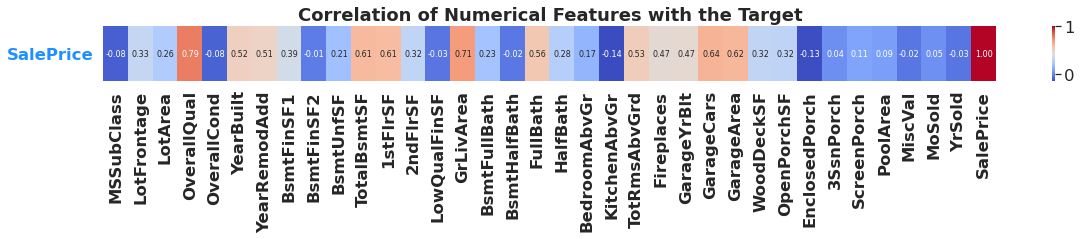

In [73]:
plt.figure(figsize=(20,1))
sns.heatmap(train.drop('Id', axis=1).corr().sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='coolwarm', annot=True, annot_kws={'size': 8}, fmt = '.2f')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

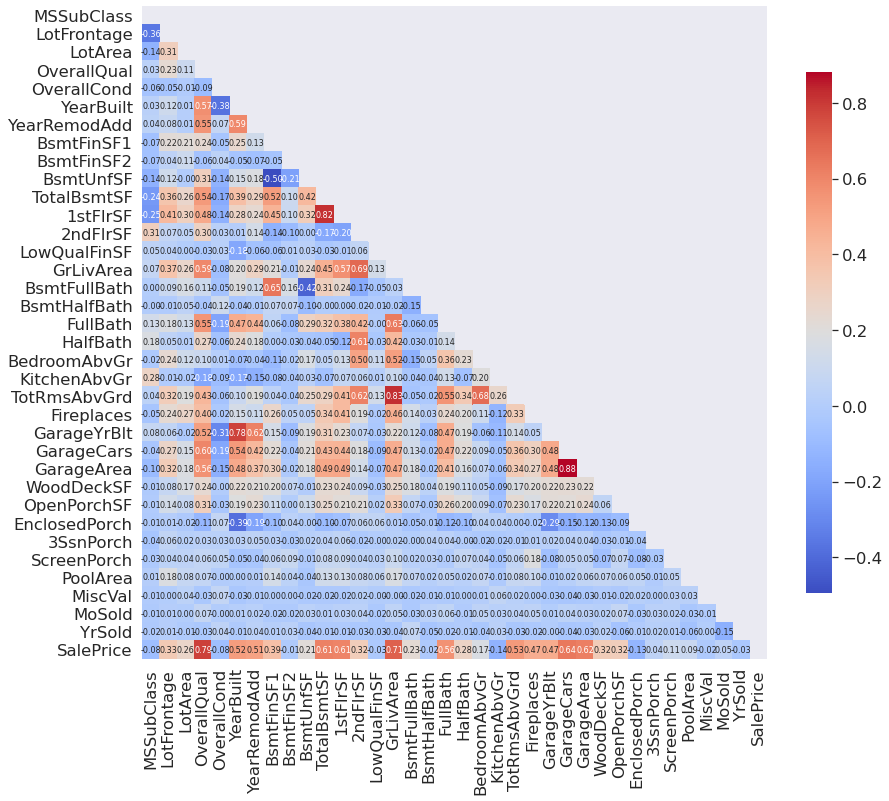

In [74]:
plt.figure(figsize=(14,12))
sns.set(font_scale=1.5)
sns.heatmap(train.drop('Id', axis=1).corr(), mask=np.triu(np.ones_like(train.drop('Id', axis=1).corr(), dtype=np.bool)), fmt='.2f', cmap='coolwarm', annot=True, cbar_kws={"shrink": .8}, annot_kws={'size':8})
plt.show()

In [75]:
'OverallQual', 'YearBuilt','YearRemodAdd','TotalBsmtSF','1stFloorSF','GrLivArea','FullBath','TotRmsAbvGrd','FirePlaces','GarageYrBlt','GarageCars','GarageArea' 

('OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFloorSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'FirePlaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea')

#### So the highly correlated ones are- 'OverallQual', 'GrlivArea', 'TotalBsmtSF','1st floorSF', 'GarageCars' etc.
#### Let's plot some of these with the target variable

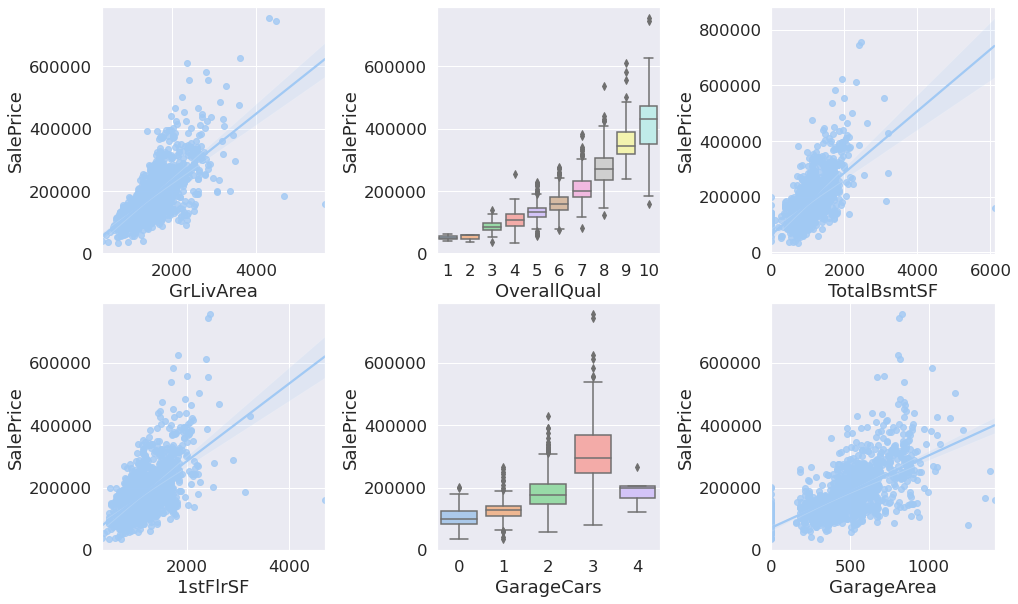

In [76]:
plt.figure(figsize=(16,10))
sns.set_palette('pastel')
plt.subplot(2,3,1)
sns.regplot(x='GrLivArea', y='SalePrice', data=train)
plt.subplot(2,3,2)
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.subplot(2,3,3)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train)
plt.subplot(2,3,4)
sns.regplot(x='1stFlrSF', y='SalePrice', data=train)
plt.subplot(2,3,5)
sns.boxplot(x='GarageCars', y='SalePrice', data=train)
plt.subplot(2,3,6)
sns.regplot(x='GarageArea', y='SalePrice', data=train)
plt.subplots_adjust(wspace=0.5)

plt.show()

#### Now lets check the relation of traget variable with categorical variables

In [77]:
traincat = train.select_dtypes(include = ['object'])
traincat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


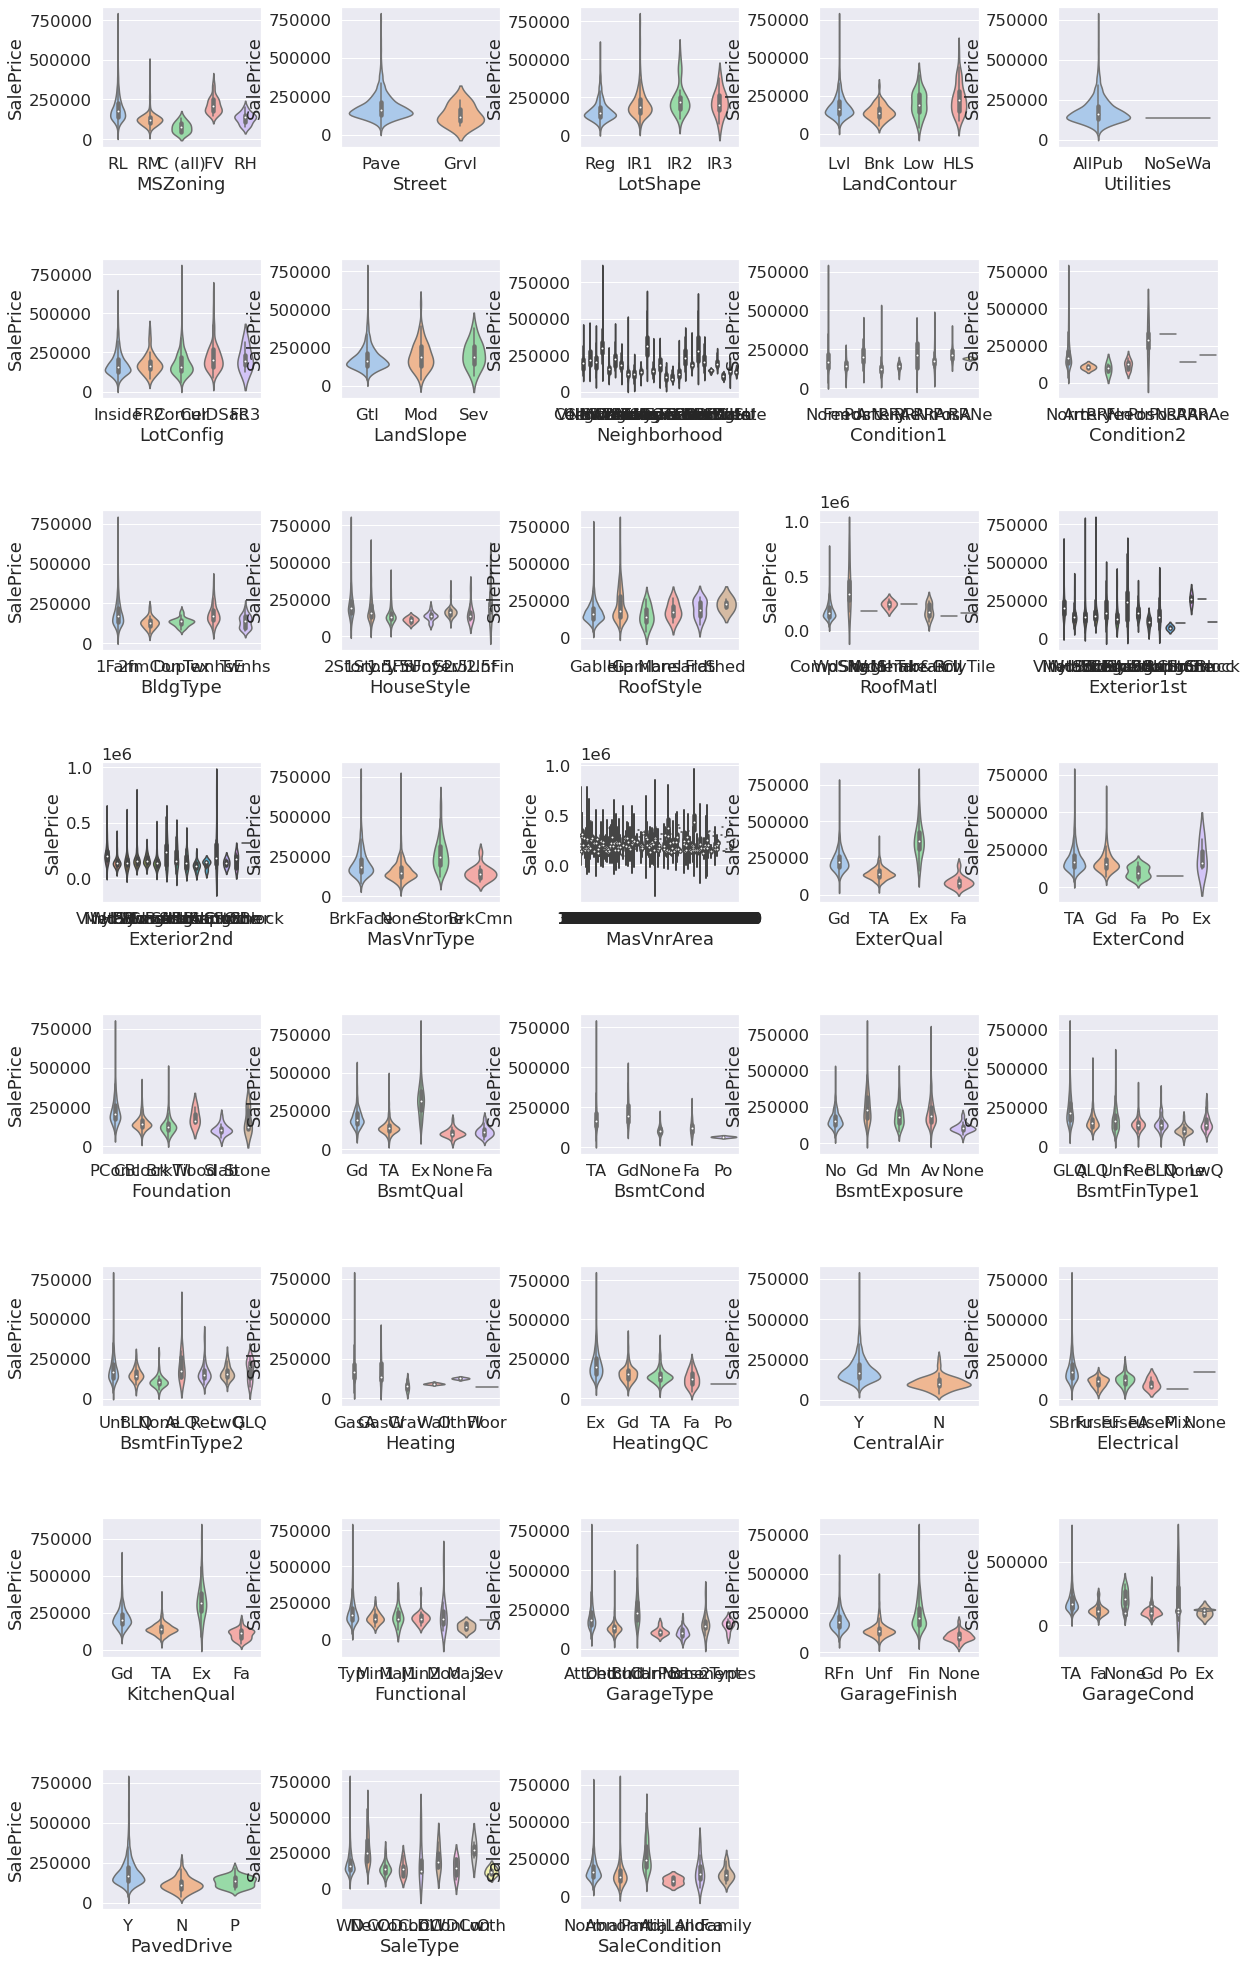

In [78]:
plt.figure(figsize=(20,35))
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.subplot(8,5,1)
sns.violinplot(x='MSZoning', y='SalePrice', data=train)
plt.subplot(8,5,2)
sns.violinplot(x='Street', y='SalePrice', data=train)
plt.subplot(8,5,3)
sns.violinplot(x='LotShape', y='SalePrice', data=train)
plt.subplot(8,5,4)
sns.violinplot(x='LandContour', y='SalePrice', data=train)
plt.subplot(8,5,5)
sns.violinplot(x='Utilities', y='SalePrice', data=train)
plt.subplot(8,5,6)
sns.violinplot(x='LotConfig', y='SalePrice', data=train)
plt.subplot(8,5,7)
sns.violinplot(x='LandSlope', y='SalePrice', data=train)
plt.subplot(8,5,8)
sns.violinplot(x='Neighborhood', y='SalePrice', data=train)
plt.subplot(8,5,9)
sns.violinplot(x='Condition1', y='SalePrice', data=train)
plt.subplot(8,5,10)
sns.violinplot(x='Condition2', y='SalePrice', data=train)
plt.subplot(8,5,11)
sns.violinplot(x='BldgType', y='SalePrice', data=train)
plt.subplot(8,5,12)
sns.violinplot(x='HouseStyle', y='SalePrice', data=train)
plt.subplot(8,5,13)
sns.violinplot(x='RoofStyle', y='SalePrice', data=train)
plt.subplot(8,5,14)
sns.violinplot(x='RoofMatl', y='SalePrice', data=train)
plt.subplot(8,5,15)
sns.violinplot(x='Exterior1st', y='SalePrice', data=train)
plt.subplot(8,5,16)
sns.violinplot(x='Exterior2nd', y='SalePrice', data=train)
plt.subplot(8,5,17)
sns.violinplot(x='MasVnrType', y='SalePrice', data=train)
plt.subplot(8,5,18)
sns.violinplot(x='MasVnrArea', y='SalePrice', data=train)
plt.subplot(8,5,19)
sns.violinplot(x='ExterQual', y='SalePrice', data=train)
plt.subplot(8,5,20)
sns.violinplot(x='ExterCond', y='SalePrice', data=train)
plt.subplot(8,5,21)
sns.violinplot(x='Foundation', y='SalePrice', data=train)
plt.subplot(8,5,22)
sns.violinplot(x='BsmtQual', y='SalePrice', data=train)
plt.subplot(8,5,23)
sns.violinplot(x='BsmtCond', y='SalePrice', data=train)
plt.subplot(8,5,24)
sns.violinplot(x='BsmtExposure', y='SalePrice', data=train)
plt.subplot(8,5,25)
sns.violinplot(x='BsmtFinType1', y='SalePrice', data=train)
plt.subplot(8,5,26)
sns.violinplot(x='BsmtFinType2', y='SalePrice', data=train)
plt.subplot(8,5,27)
sns.violinplot(x='Heating', y='SalePrice', data=train)
plt.subplot(8,5,28)
sns.violinplot(x='HeatingQC', y='SalePrice', data=train)
plt.subplot(8,5,29)
sns.violinplot(x='CentralAir', y='SalePrice', data=train)
plt.subplot(8,5,30)
sns.violinplot(x='Electrical', y='SalePrice', data=train)
plt.subplot(8,5,31)
sns.violinplot(x='KitchenQual', y='SalePrice', data=train)
plt.subplot(8,5,32)
sns.violinplot(x='Functional', y='SalePrice', data=train)
plt.subplot(8,5,33)
sns.violinplot(x='GarageType', y='SalePrice', data=train)
plt.subplot(8,5,34)
sns.violinplot(x='GarageFinish', y='SalePrice', data=train)
plt.subplot(8,5,35)
sns.violinplot(x='GarageQual', y='SalePrice', data=train)
plt.subplot(8,5,35)
sns.violinplot(x='GarageCond', y='SalePrice', data=train)
plt.subplot(8,5,36)
sns.violinplot(x='PavedDrive', y='SalePrice', data=train)
plt.subplot(8,5,37)
sns.violinplot(x='SaleType', y='SalePrice', data=train)
plt.subplot(8,5,38)
sns.violinplot(x='SaleCondition', y='SalePrice', data=train)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

plt.show()

#### More the variation in mean, stronger the corelation with the target variable.
#### So, Mszoning, neighborhood, condition1, condition2, roofmatl, exterquality, basementqual, centralair, kitchenqual, saletype, MasVnrType are strongly corelated with SalePrice. 


  

#### So let's keep the following features for modelling

In [79]:
features=['OverallQual', 'YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','MSZoning', 'Neighborhood','Condition1', 'Condition2', 'RoofMatl', 'ExterQual','BsmtQual', 'CentralAir', 'KitchenQual','SaleType','MasVnrType', 'SaleCondition','HouseStyle']

In [80]:
traintest=pd.concat([train, test], axis=0, sort=False)
traintest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [81]:
traintest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,WD,Normal,NaN


In [82]:
traintest.shape

(2919, 76)

In [83]:
train_test = pd.get_dummies(traintest[features])
train_test.head()

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,TotalBsmtSF_0,...,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7,2003,2003,856,1710,2,8,0,2003.0,0,...,1,0,0,0,0,0,0,1,0,0
1,6,1976,1976,1262,1262,2,6,1,1976.0,0,...,1,0,0,0,1,0,0,0,0,0
2,7,2001,2002,920,1786,2,6,1,2001.0,0,...,1,0,0,0,0,0,0,1,0,0
3,7,1915,1970,961,1717,1,7,1,1998.0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,2198,2,9,1,2000.0,0,...,1,0,0,0,0,0,0,1,0,0


In [84]:
X_train=train_test[0:1460]
X_test=train_test[1460:2919]
y_train= train[['SalePrice']]

In [87]:
print('Train', X_train.shape)
print('Test', X_test.shape)

Train (1460, 1779)
Test (1459, 1779)


In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.fit_transform(X_test)
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [89]:

print(round(lr.score(X_train, y_train)*100,2))

#mean_squared_error(y_test, prediction, squared=False)

99.0


In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
print(round(forest_model.score(X_train, y_train)*100,2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


97.92


In [94]:
print(prediction)

[[144586.45825778]
 [149593.21915464]
 [247557.92817421]
 ...
 [167062.43820285]
 [128967.21125638]
 [174583.3358514 ]]


In [98]:
pred=[]
for item in prediction:
    for i in item:
        pred.append(i)
    
print(pred)

[144586.4582577803, 149593.21915464196, 247557.9281742099, 189608.30793463404, 201999.98684831802, 192688.36444988113, 162871.88851320278, 374640.3328607358, 155860.44958341995, 158930.8953105004, 206283.54270517966, 91009.13676101982, 94073.32402111136, 151985.39125257893, 116819.17419009167, 316137.5147746211, 227994.29376054474, 330836.7975809651, 230245.68363012944, 311965.65500440507, 213720.0543725699, 195682.08479126438, 239763.849980121, 153844.430164492, 182336.77918027667, 241380.7921318605, 333774.8115668781, 214841.67349208565, 215447.8958408255, 209370.61393469374, 196189.90920883033, 79296.66873576044, 177281.41552416247, 264582.93088831566, 247909.02870108024, 197412.84828900592, 186788.14413571998, 157487.19022278755, 157000.36839044734, 149662.55386487732, 169146.0260186157, 196935.43845382892, 293453.63357363665, 272598.1113737164, 201096.41493429162, 194771.78608571843, 238464.32954149018, 222077.2309481618, 171275.66395951947, 154023.88128513296, 153039.9885474561, 

In [99]:
#Code required to submit for competition
output = pd.DataFrame({'Id':pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id'], 'SalePrice': pred})


In [100]:
output.head()

,Id,SalePrice
0,1461,144586.458258
1,1462,149593.219155
2,1463,247557.928174
3,1464,189608.307935
4,1465,201999.986848


In [102]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
